# Taylor Method

This notebook implements the 3rd order Taylor method for three different population intial value problems.

# 3rd Order Taylor
The general 3rd Order Taylor method for to the first order differential equation
$$ y^{'} = f(t,y) $$
numerical approximates $y$ the at time point $t_i$ as $w_i$
with the  formula:
$$ w_{i+1}=w_i+h\big[f(t_i,w_i)+\frac{h}{2}f'(t_i,w_i)+\frac{h^2}{6}f''(t_i,w_i)\big],$$
where $h$ is the stepsize.
for $i=0,...,N-1$.
With the local truncation error of 
$$\tau=\frac{h^3}{24}y^{''''}(\xi_i),$$
where $\xi \in [t_i,t_{i+1}]$.
To illustrate the method we will apply it to three intial value problems:
## 1. Linear 
Consider the linear population Differential Equation
$$ y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

## 2. Non-Linear Population Equation 
Consider the non-linear population Differential Equation
$$ y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

## 3. Non-Linear Population Equation with an oscillation 
Consider the non-linear population Differential Equation with an oscillation 
$$ y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

## Read in Libraries 

In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")

from IPython.display import HTML

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [2]:
 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised into $N$ points seperated by a constant stepsize
$$ h=\frac{b-a}{N}.$$
Here the interval is $2000\leq t \leq 2020,$ 
$$ h=\frac{2020-2000}{200}=0.1.$$
This gives the 201 discrete points:
$$ t_0=2000, \ t_1=2000.1, \ ... t_{200}=2020. $$
This is generalised to 
$$ t_i=2000+i0.1, \ \ \ i=0,1,...,200.$$
The plot below shows the discrete time steps:

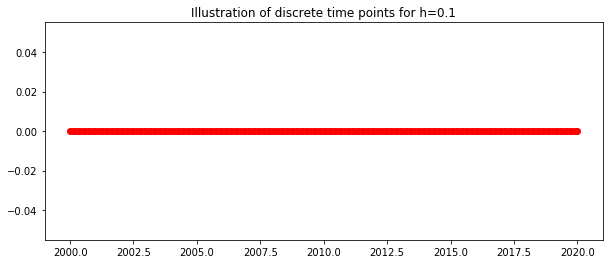

In [3]:
N=200
t_end=2020.0
t_start=2000.0
h=((t_end-t_start)/N)
t=np.arange(t_start,t_end+h/2,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.show()

# 1. Linear Population Equation
## Exact Solution 
The linear population equation
$$ y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$
has a known exact (analytic) solution
$$ y=6e^{0.1(t-2000)}. $$

## Specific 3rd Order Taylor for the Linear Population Equation
To write the specific 3rd Order Taylor difference equation for the intial value problem we need to calculate the first derivative of 
$$f(t,y)=0.1y,$$

In [4]:
def linfun(t,w):
    ftw=0.1*w
    return ftw

with respect to t
$$ f'(t,y)=0.1y'=0.1(0.1y)=0.01y $$

In [5]:
def linfun_d(t,w):
    ftw=0.01*w
    return ftw

and the second derivative of $f$ with respect to $t$,
$$f'(t,y)=0.01y'=0.01(0.1y)=0.001y.$$

In [6]:
def linfun_dd(t,w):
    ftw=0.001*w
    return ftw

### Linear Population 3rd Order Taylor Difference equation
Substituting the derivatives of the linear population equation into the 3rd order Taylor equation gives the difference equation 
$$ w_{i+1}= w_{i} + h\big[0.1 w_i+\frac{h}{2}(0.01 w_i)+\frac{h^2}{6}(0.001w_i)\big], $$
for $i=0,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with the initial condition
$$w_0=6.$$

## Method

In [7]:
w=np.zeros(N+1)
w[0]=6.0
for i in range (0,N):
    w[i+1]=w[i]+h*(linfun(t[i],w[i])+h/2*linfun_d(t[i],w[i])+h*h/6*linfun_dd(t[i],w[i]))

## Results
The plot below shows the exact solution, $y$ (squares) and the 3rd order numberical approximation, $w$ (circles) for the linear population equation:

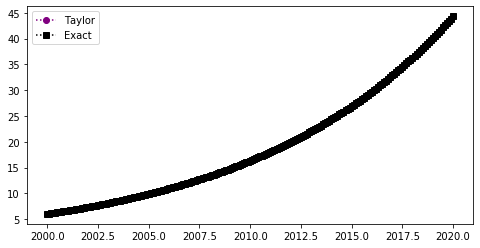

In [8]:
y=6*np.exp(0.1*(t-2000))
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Taylor')
plt.plot(t,y,'s:',color='black',label='Exact')
plt.legend(loc='best')
plt.show()

## Table
The table below shows the time, the 3rd order numerical approximation, $w$,  the exact solution, $y$, and the exact error $|y(t_i)-w_i|$ for the linear population equation:

In [9]:
table = ListTable()
table.append(['time', 'Taylor (w)',  'Exact (y)','Exact Error'])
for i in range (0,10):
    table.append([round(t[i],2),  round(w[i],9), round(y[i],9),np.abs(round(y[i]-w[i],10))])
    
table



time,Taylor (w),Exact (y),Exact Error
2000.0,6.0,6.0,0.0
2000.1,6.060301,6.060301003,2.5e-09
2000.2,6.121208035,6.12120804,5.1e-09
2000.3,6.182727196,6.182727204,7.7e-09
2000.4,6.244864635,6.244864645,1.03e-08
2000.5,6.307626565,6.307626578,1.3e-08
2000.6,6.371019263,6.371019279,1.58e-08
2000.7,6.435049069,6.435049088,1.86e-08
2000.8,6.499722385,6.499722406,2.15e-08
2000.9,6.565045678,6.565045702,2.44e-08


## 2. Non-Linear Population Equation 
$$ y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$
## Specific 3rd Order Taylor for the Non-Linear Population Equation
To write the specific 3rd Order Taylor difference equation for the intial value problem we need to calculate the first derivative of 
$$f(t,y)=0.2y-0.01y^2,$$

In [10]:
def nonlinfun(t,w):
    ftw=0.2*w-0.01*w*w
    return ftw

with respect to $t$
$$ f'(t,y)=0.2y'-0.02y'y=0.2(0.2y-0.01y^2)-0.02(0.2y-0.01y^2)y$$
$$=(0.2-0.02y)(0.2y-0.01y^2)=(0.2-0.02y)f(t,y) $$

In [11]:
def nonlinfun_d(t,w):
    ftw=0.2*nonlinfun(t,w)-0.02*nonlinfun(t,w)*w
    return ftw

and the second derivative with respect to $t$
$$ f''(t,y)=-0.02y'(0.2y-0.01y^2)+(0.2-0.02y)(0.2y'-0.02y'y)
$$=-0.02(0.2y-0.01y^2)^2+(0.2-0.02y)^2(0.2y-0.01y^2) $$

In [12]:
def nonlinfun_dd(t,w):
    ftw=-0.02*nonlinfun(t,w)*nonlinfun(t,w)+(0.2-0.02*w)*nonlinfun_d(t,w)
    return ftw

###  Non-Linear Population 3rd Order Taylor Difference equation
Substituting the derivatives of the non-linear population equation into the 3rd order Taylor equation gives the difference equation 
$$ w_{i+1}= w_{i} + h\big[\big(0.2w_i-0.01w_i^2\big)+\frac{h}{2}\big((0.2-0.02w_i)(0.2w_i-0.01w_i^2)\big)+$$
$$\frac{h^2}{6}\big(-0.02(0.2w_i-0.01w_i^2)^2+(0.2-0.02w_i)^2(0.2w_i-0.01w_i^2)\big)\big], $$
for $i=0,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with the initial condition
$$w_0=6.$$

In [13]:
w=np.zeros(N+1)
w[0]=6.0
for i in range (0,N):
    w[i+1]=w[i]+h*(nonlinfun(t[i],w[i])+h/2*nonlinfun_d(t[i],w[i])+h*h/6*nonlinfun_dd(t[i],w[i]))

## Results
The plot below shows the 3rd order numerical approximation, $w$ (circles) for the non-linear population equation:

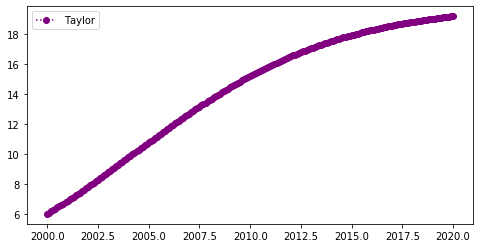

In [14]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Taylor')
plt.legend(loc='best')
plt.show()

## Table
The table below shows the time and the 3rd order numerical approximation, $w$,  for the non-linear population equation:

In [15]:
table = ListTable()
table.append(['time', 'Taylor (w)'])
for i in range (0,10):
    table.append([round(t[i],2),  round(w[i],9)])
    
table


time,Taylor (w)
2000.0,6.0
2000.1,6.084334544
2000.2,6.169332114
2000.3,6.254983361
2000.4,6.341278528
2000.5,6.428207453
2000.6,6.515759568
2000.7,6.6039239
2000.8,6.692689078
2000.9,6.782043333


## 3. Non-Linear Population Equation with an oscilation 
$$ y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

## Specific 3rd Order Taylor for the Non-Linear Population Equation with an oscilation
To write the specific 3rd Order Taylor difference equation for the intial value problem we need calculate the first derivative of 
$$f(t,y)=0.2y-0.01y^2+\sin(2\pi t),$$

In [16]:
def nonlin_oscfun(t,w):
    ftw=0.2*w-0.01*w*w+np.sin(2*np.math.pi*t)
    return ftw

with respect to $t$
$$ f'(t,y)=0.2y'-0.02y'y+2\pi\cos(2\pi t)$$
$$=(0.2-0.02y)\big(0.2y-0.01y^2+\sin(2\pi t)\big)+2\pi\cos(2\pi t) $$

In [17]:
def nonlin_oscfun_d(t,w):
    ftw=0.2*nonlinfun(t,w)-0.02*nonlinfun(t,w)*w+2*np.math.pi*np.cos(2*np.math.pi*t)
    return ftw

and the second derivative with respect to $t$
$$ f''(t,y)=-0.02y'(0.2y-0.01y^2+\sin(2\pi t))$$
$$+(0.2-0.02y)\big(0.2y'-0.02y'y+2\pi\cos(2\pi t)\big)-(2\pi)^2\sin(2\pi t)$$
$$=-0.02(0.2y-0.01y^2+2\pi\sin(2\pi t))^2$$
$$+(0.2-0.02y)\big((0.2-0.02y)(0.2y-0.01y^2+\sin(2\pi t))+ 2\pi\cos(2\pi t) \big)-(2\pi)^2\sin(2\pi t) $$

In [18]:
def nonlin_oscfun_dd(t,w):
    ftw=-0.02*nonlin_oscfun(t,w)*nonlin_oscfun(t,w)+(0.2-0.02*w)*((0.2-0.02*w)*nonlin_oscfun(t,w)+2*np.math.pi*np.cos(2*np.math.pi*t))#-2*np.math.pi*2*np.math.pi*np.sin(2*np.math.pi*t)
    return ftw

###  Non-Linear Population with oscilation 3rd Order Taylor Difference equation
Substituting the derivatives of the non-linear population equation with oscilation into the 3rd order Taylor equation gives the difference equation 
$$ w_{i+1}= w_{i} + h\big[\big(0.2w_i-0.01w_i^2+\sin(2\pi t_i)\big)$$
$$+\frac{h}{2}\big((0.2-0.02w_i)\big(0.2w_i-0.01w_i^2+\sin(2\pi t_i)\big)+2\pi\cos(2\pi t_i)\big)+$$
$$\frac{h^2}{6}\big(-0.02(0.2w_i-0.01w_i^2+2\pi\sin(2\pi t_i))^2$$ 
$$+(0.2-0.02w_i)\big((0.2-0.02w_i)[0.2w_i-0.01w_i^2+\sin(2\pi t_i)]$$
$$+ 2\pi\cos(2\pi t_i) \big)-(2\pi)^2\sin(2\pi t_i) \big)\big], $$
for $i=0,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with the initial condition
$$w_0=6.$$

In [19]:
w=np.zeros(N+1)
w[0]=6.0
for i in range (0,N):
    w[i+1]=w[i]+h*(nonlin_oscfun(t[i],w[i])+h/2*nonlin_oscfun_d(t[i],w[i])+h*h/6*nonlin_oscfun_dd(t[i],w[i]))

## Results
The plot below shows the 3rd order numerical approximation, $w$ (circles) for the non-linear population equation:

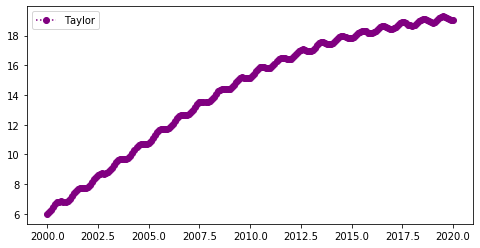

In [20]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Taylor')
plt.legend(loc='best')
plt.show()

## Table
The table below shows the time and the 3rd order numerical approximation, $w$,  for the non-linear population equation:

In [21]:
table = ListTable()
table.append(['time', 'Taylor (w)'])
for i in range (0,10):
    table.append([round(t[i],2),  round(w[i],9)])
    
table


time,Taylor (w)
2000.0,6.0
2000.1,6.115834246
2000.2,6.28533224
2000.3,6.476682151
2000.4,6.649942156
2000.5,6.772316267
2000.6,6.830701887
2000.7,6.836694173
2000.8,6.822138124
2000.9,6.826947938
